In [ ]:
%pip install vaderSentiment
%pip install matplotlib
%pip install beautifulsoup4
%pip install ipython
%pip install scikit-learn
%pip install keras
%pip install numpy
%pip install textblob
%pip install nltk

#Sentiment of Original Texts

In [ ]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from IPython.display import Markdown
from bs4 import BeautifulSoup
from IPython.display import display, Markdown


# Data Preparation
response = requests.get("https://www.rocketlawyer.com/business-and-contracts/business-operations/product-or-service-sales/document/independent-contractor-agreement")
response.encoding = "ISO-8859-1"
text_data = response.text

# Extract the text from the HTML content
soup = BeautifulSoup(text_data, "html.parser")
text = soup.get_text()


# Split the text data into individual documents
documents = text_data.split('\n')
documents = text.split('. ')

# Split the documents into training and testing sets
train_data, test_data = train_test_split(documents, test_size=0.2)

# Split the text into individual sentences
sentences = text.split('. ')

# Text Vectorization with Stop Words
vectorizer = CountVectorizer(stop_words='english')
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

# Define Training Labels
train_labels = [0] * len(train_data)

# Building the RNNs Model
model = Sequential()
model.add(Embedding(input_dim=train_vectors.shape[1], output_dim=100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Training the RNNs Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
train_labels = np.array(train_labels)
model.fit(train_vectors.toarray(), train_labels, epochs=10, batch_size=32)

# Predicting the Polarity
predictions = model.predict(test_vectors.toarray())

# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = analyzer.polarity_scores(sentences)
print("Overall Sentiment Score is Positive:",sentiment_scores)

Epoch 1/10
4/4 [==============================] - 7s 1s/step - loss: 0.6424 - accuracy: 0.7355
Epoch 2/10
4/4 [==============================] - 5s 1s/step - loss: 0.3892 - accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 6s 1s/step - loss: 0.0230 - accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 6s 1s/step - loss: 0.0016 - accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 3s 708ms/step - loss: 5.2018e-04 - accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 3s 826ms/step - loss: 2.4846e-04 - accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 3s 713ms/step - loss: 1.4624e-04 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 3s 703ms/step - loss: 9.9760e-05 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 3s 748ms/step - loss: 7.5654e-05 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 517ms/step
Overall Sentiment Score is Positive: {'neg': 

#Inject Positive Sentences

In [ ]:
# Inject positive sentences and highlight them
positive_sentences = [
    "Independent Contractor Agreements offer flexibility in work schedules and project timelines, allowing contractors to manage their time efficiently",
    "Contractors bring specialized skills and expertise to projects, enhancing the quality of work delivered",
    "Hiring independent contractors can be cost-effective as they are responsible for their own taxes, benefits, and equipment",
    "Businesses can easily scale their workforce up or down based on project requirements by engaging independent contractors"

]

# highlighted_text = ""
# for i, sentence in enumerate(sentences):
#     if i < len(positive_sentences):
#         # Inject positive sentence
#         highlighted_sentence = f"**{positive_sentences[i]}**"
#         highlighted_text += highlighted_sentence + ". "
#     highlighted_text += sentence + ". "

# # Display the modified text with highlighted positive sentences
# display(Markdown(highlighted_text))

highlighted_text = ""
highlighted_sentences = []

for i, sentence in enumerate(sentences):
    if i < len(positive_sentences):
        # Inject positive sentence
        highlighted_sentence = f"**{positive_sentences[i]}**"
        highlighted_sentences.append(highlighted_sentence)
    highlighted_sentences.append(sentence)

highlighted_sentences.sort()
highlighted_text = ". ".join(highlighted_sentences)

# Display the modified text with highlighted positive sentences
display(Markdown(highlighted_text))



sentiment_scores = analyzer.polarity_scores(positive_sentences)

print("Overall Sentiment Score is Positive:",sentiment_scores)
print('-' * 50)



. 



































. 






Free Independent Contractor Agreement Template - Rocket Lawyer
































































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Business operations






⌃


Sell products or services













MAKE YOUR FREE Independent Contractor Agreement


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Independent Contractor Agreement
            


Make document                    



 


Other Names:
Freelance Contract
Consulting Agreement
Contract Labor Form
1099 Contractor Agreement
Independent Contractor Contract
Freelancer Contractor Agreement
Consulting Contract
Consulting Services Agreement








What weâll cover



About Independent Contractor Agreements


Independent Contractor Agreement FAQs


Independent Contractor Agreement checklist






What is an Independent Contractor Agreement?
An Independent Contractor Agreement is a legal contract that outlines the scope, payment schedule, and deadlines for freelance work. 




Back to top



Back to top












Our quality guarantee
We guarantee our service is safe and secure, and that properly executed Rocket Lawyer legal documents are legally enforceable under applicable US laws.
Need help? No problem!
Ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.



Independent Contractor Agreement checklist
Complete your free Independent Contractor Agreement with our Make it Legal™ checklist







Make this document
Customize your Independent Contractor Agreement by answering simple questions. 




Collapse












Independent Contractor Agreement FAQs








Collapse all

|






Expand all







Why does a business owner need an Independent Contractor Agreement?





A business owner needs an Independent Contractor Agreement for several reasons.
Setting Expectations: An Independent Contractor Agreement explicitly sets out the expectations and parameters of the work to be done, the compensation, and the nature of the relationship itself. 




Collapse





Definitions of Independent Contractor Terms






Term


Definition 




Confidential Information


Private information regarding the business operations of an employer or independent contractor, such as client lists, processes, formulas, or payroll data. 



What are options for signing an Independent Contractor Agreement remotely?





There are various options available for signing an Independent Contractor Agreement remotely, but the most efficient way is to use a third-party application, such as RocketSignÂ®, to sign the document electronically. 



What should be included in an Independent Contractor Agreement?





An Independent Contractor Agreement should contain all of these basic terms:

Description of the services to be provided.
How payment will be handled, whether hourly or on a per-project basis.
Term of the agreement, typically with a definitive end date.
Explanation of what the hiring party will provide or not provide, such as equipment, for the independent contractor to use.
Ownership of work product if that is relevant to the work being performed.
Confidentiality clause.
Applicable governing law of the agreement.

These terms, as well as several others, are included in this free Independent Contractor Agreement.  .    .    .    .    .      .      No other fees and/or expenses will be paid to the Contractor, unless such fees and/or expenses have been approved in advance by the appropriate executive on behalf of the Recipient in writing.    It is contemplated that the relationship between the Contractor and the Recipient shall be a non-exclusive one. "Confidential information" is information that is unique, and for which there would be harm if it was disclosed. **Businesses can easily scale their workforce up or down based on project requirements by engaging independent contractors**. **Contractors bring specialized skills and expertise to projects, enhancing the quality of work delivered**. **Hiring independent contractors can be cost-effective as they are responsible for their own taxes, benefits, and equipment**. **Independent Contractor Agreements offer flexibility in work schedules and project timelines, allowing contractors to manage their time efficiently**. A severability clause states that the illegal or unenforceable provision can be removed â or severed â and the rest of the contract will remain valid and in force. A single lump sum payment may be made at the completion of service or at some other defined date or event. A typical waiver of breach clause states that, if either party waives their right to enforce the contract or recover damages after a breach by the other party, that will not prevent future actions to enforce the contract or claim damages.



 




Collapse





Tips for Finding and Working With Freelancers


It is easier than ever to find freelance workers for nearly any type of project. APPLICABLE LAW. All terms and conditions contained in any other writings previously executed by the parties regarding the matters contemplated herein shall be deemed to be merged herein and superseded hereby. An "employer-employee" or "principal-agent" relationship is not created merely because (1) the Recipient has or retains the right to supervise or inspect the work as it progresses in order to ensure compliance with the terms of the contract or (2) the Recipient has or retains the right to stop work done improperly. An Independent Contractor Agreement can help you get the details in a written document that is signed by both parties. An advantage to using an online or staffing service is that they often take care of most of the paperwork for you. An indemnification clause in an independent contractor agreement, for example, might state that the independent contractor will be liable for legal claims by third parties arising from their services for the employer, and that the independent contractor will cover the cost of any such claim brought against the employer.




Independent Contractor


An individual or business that has an employment relationship with an employer, but is not an employee. And positive reviews about their project experience with you can help foster beneficial future business relationships.
Working with freelancers can be a great experience if you choose freelancers carefully, be clear about what you need, get the arrangement in writing and signed by both parties, and communicate regularly throughout the project. Any conflict of interest can cause the agent to be legally liable to the principal.




Proprietary Information


Confidential information possessed by an employer, to which an independent contractor or employee may have access in the course of their employment. Beginning on , the Contractor will provide the following services (collectively, the "Services"):         . Compared to employees, they are subject to less control by the employer over how, when, and where they do their work. DESCRIPTION OF SERVICES. ENTIRE AGREEMENT. EXPENSES PAID BY CONTRACTOR. Each party to this relationship has obligations to the other:


The employee must perform their job duties according to their agreement with the employer.


The employer must pay the employee and provide other benefits or perks according to their agreement. Either party may entrust confidential information to the other, although it is more common for employers to entrust such information to independent contractors. Employers usually provide some benefits to employees, such as health insurance and paid time off. Examples may include inventions, designs, formulas, computer code, and other data developed by or for the business. Except in extraordinary circumstances and when necessary, the Contractor shall perform the Services without direct supervision by the Recipient. Except to the extent that the Contractor works in a territory as defined by the Recipient,  services are not integrated into the mainstream of the Recipient's business. For example, "As described in the attached Exhibit."
Payment for Services
This clause describes how payment will be made. For example, independent contractors are responsible for paying all of their own income taxes, while employers are required to deduct part of the employees' taxes from their paychecks. For example: ABC Widget Corporation, Tanya Jones, President.
Contractor
Includes the full name and address of the service provider. 
Description of Services
A description of the services to be provided is an essential part of an Independent Contractor Agreement. Generally, Paying a lump sum fee upon completion of the services is generally recommended to avoid a determination by the IRS that the Contractor is an employee.
Term / Termination
The Independent Contractor Agreement often specifies when the agreement will end. Get started now!





Review your agreement
Look over your customized Independent Contractor Agreement to ensure it matches your intentions. Getting ink signatures on a contract can be a hassle. Having proof of insurance for the activity that the agreement will govern provides additional protection to the Recipient. 
Similarly, a Recipient can also require that the Contractor indemnify the Recipient for any injuries that the Recipient may encounter or cause through the acts of the Contractor. Here are some tips for doing just that.
Evaluating Freelancers
Online freelancer platforms offer a number of ways to evaluate freelancers based on skills and performance. However, if payment (based on the fixed wage) is made weekly or biweekly, the IRS may view such an arrangement as indicating an employer/employee relationship. However, the parties may mutually agree that the Contractor shall perform other services for the Recipient, pursuant to the terms of this Agreement. However, you still need to choose the right freelancer for your needs and maintain a positive relationship. If a court finds that any provision of this Agreement is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited. If any provision of this Agreement shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. If one provision turns out to be unenforceable or unlawful, that could mean that the entire contract is invalid. If that is the case, the parties may choose to have the agreement continue in effect until one of the parties elects to terminate or end it. If the Contractor has assistants, it is the Contractor's responsibility to hire them and to provide materials for them. If the agreement is for services that will be provided on an ongoing basis, fixed wages can be defined to pay for the services at an hourly rate or other period of payment. If the arrangement between the Recipient and the Contractor conforms more closely to the characteristics of an employee/employer relationship, the Employment Agreement may be more appropriate.



Show more





Back to top





Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Independent Contractor Agreement also made:





Non-Disclosure Agreement (NDA)
Ensure that proprietary information stays private







Employment Contract
Make your new hire official







Contract for Services
Set clear terms and conditions for any services







Noncompete Agreement
Protect your company's proprietary information






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Independent Contractor Agreement now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. If the parties know in advance when the services of the Contractor will no longer be needed, that specific date can be entered.  
The parties sometimes want an ongoing relationship. If you are not sure about the employment relationship, you should consult with a Rocket Lawyer network attorney for affordable legal advice.
Here are the main provisions found in an Independent Contractor Agreement, along with descriptions of what the provisions contain and what they mean.
Recipient of Services
Includes the full name of the company, as well as the name and title of the representative who will sign the agreement on the company's behalf. Independent Contractor section below. Independent contractors often have their own established business or trade that exists separate from the employer. It is a clear-cut explanation of the expected workflow, how communication will be handled, and how the relationship will work.
Work Product Ownership: An Independent Contractor Agreement protects your business interests by:


Establishing ownership of any work product generated as a result of the arrangement.


Requiring contractors to actively protect trade secrets.


Providing for confidentiality and non-disclosure of key business information.


Affirming the Independent Contractor-Client Relationship: Employers are required to do certain things for employees that they are not required to do for independent contractors, so it's important to affirm the relationship in writing. It is also helpful to network with good freelancers since they may have connections to other talent you may need to help you with future projects. It is designed to clearly establish the Contractor as an independent contractor and not as the Recipientâs employee. It is recommended that you read about the IRS guidelines in the Employee vs. It is understood by the parties that the Contractor is an independent contractor with respect to the Recipient, and not an employee of the Recipient. Look for the following information: 

Client reviews
Project completions (the number of projects the freelancer has completed)
Portfolios or examples of work
Response time
Recent employment
Education or certifications
Skills test scores

If you need someone to create assets for you, such as illustrations, infographics, photos, design templates, a website, articles, blog posts, social media posts, videos, etc., be sure to ask for examples of their work before hiring them. Most freelance creatives will have a portfolio to show prospective clients. 
Also consider scheduling an in-person, phone, or video interview in addition to checking available information about the freelancer. Multiple installment payments may be made on specific dates or after specific events have occurred, such as completion of various stages of a project. NO LOCATION ON PREMISES. NO RIGHT TO ACT AS AGENT. NO SET WORK HOURS. No modification of this Agreement shall be deemed effective unless in writing and signed by the parties hereto. Of course, if an employment relationship is desired by both parties, then an Employment Contract might be used. PAYMENT FOR SERVICES. PERSONAL SERVICES NOT REQUIRED. PROFESSIONAL CAPACITY. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. Plus, you can always save and continue later once youâve started your document creation process. Proprietary information that has value to the employer by virtue of not being widely known to the general public is known as âtrade secrets.â Independent contractors may be expected to safeguard the secrecy of proprietary information under a non-disclosure agreement (NDA). RECIPIENT'S CONTROL. RELATIONSHIP OF PARTIES. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. RocketSign eliminates the back-and-forth by providing an end-to-end solution for your document signing needs.
Having an Independent Contractor Agreement with each of your freelancers will help establish the work to be done, protect your interests in the assets that are created by the independent contractor for your business, and add clarity to the independent contractor-client relationship that is the intent of both you and your new freelancer. SEVERABILITY. SIGNATORIES. Signed by both the contractor and the client, this agreement can help to set expectations and reduce the risk of conflicts.
When can you use an Independent Contractor Agreement?

You will be completing services for a person or company on a project-to-project basis (i.e. Signing documents electronically has become a necessity due to the business challenges that have arisen as a result of the COVID-19 pandemic. TERM/TERMINATION. The Contractor also performs services for other organizations and/or individuals. The Contractor has no desk or other equipment either located at or furnished by the Recipient. The Contractor has no right to act as an agent for the Recipient and has an obligation to notify any involved parties that it is not an agent of the Recipient. The Contractor has no set hours of work. The Contractor has not and will not receive training from the Recipient regarding how to perform the Services. The Contractor is a professional who uses  own professional and business methods to perform services. The Contractor is not required to render the Services personally and may employ others to perform the Services on behalf of the Recipient without the Recipient's knowledge or consent. The Contractor shall be solely responsible for any and all taxes, Social Security contributions or payments, disability insurance, unemployment taxes, and other payroll type taxes applicable to such compensation. The Contractor's business and travel expenses are to be paid by the Contractor and not by the Recipient. The Recipient has no right or power to control or otherwise interfere with the Contractor's mode of effecting performance under this Agreement. The Recipient has no right to assign services to the Contractor other than as specifically contemplated by this Agreement. The Recipient has no right to further inquire into the Contractor's other activities. The Recipient may wish to require that the Contractor obtain insurance to cover all of its employees as to this particular agreement. The Recipient will not provide fringe benefits, including health insurance benefits, paid vacation, or any other employee benefit, for the benefit of the Contractor. The Recipient will pay compensation to the Contractor for the Services upon completion of the Services. The Recipient's only concern is the result of the Contractor's work, and not the means of accomplishing it. The activities that are the responsibility of the Contractor versus the Recipient helps to establish that the Contractor is not the Recipientâs employee. 
Recipientâs Control
This clause establishes that the Recipient is not in control of how the Contractor does their work.
Professional Capacity
This clause establishes that the Contractor is a professional and does not require training from the Recipient in order to do their work.
Personal Services Not Required
This provision states clearly that the Contractor is not required to perform services personally, but may, instead, hire others to perform the services required under the contract.
No Location on Premises
This provision states that the Contractor does not have equipment or a desk located at or furnished by the Recipient.
No Set Work Hours
This clause confirms that the Contractor has no set hours and is not required to work a set number of hours.
Expenses Paid by Contractor
This clause establishes that business and travel expenses will be paid by the Contractor, not the Recipient.
Ownership of Social Media Contacts
If the Independent Contractor will create, operate, or maintain social media accounts for the Recipient, this clause can spell out who will own the contacts associated with the accounts.
Independent Contractor Confidentiality
The Independent Contractor Agreement sometimes includes a clause that obligates the Contractor to protect and not disclose the Recipient's proprietary or confidential information. The agentâs authority may be subject to change or revocation by the principal.
When acting on behalf of the principal, the agent has a fiduciary duty to put the principalâs interests first. The contract between the parties might include a non-disclosure agreement (NDA) or confidentiality clause that prevents either party from revealing the otherâs confidential information.




Employer-Employee Relationship


A relationship by which an employee performs work for the employer, and the employer provides, at a minimum, financial compensation. The parties may then modify or rewrite the invalid provision.




Waiver of Breach


A clause commonly included in independent contractor agreements that addresses the enforceability of the contract. The principal can grant broad authority to the agent, or it can limit the agentâs authority to certain acts, issues, or matters. The waiver by the Recipient of a breach of any provision of this Agreement by Contractor shall not operate or be construed as a waiver of any subsequent breach by Contractor. There are numerous online resources for finding contract workers for technical gigs such as app building, website creation, and content writing. There is no requirement that the Contractor work full time or otherwise account for work hours. These are common payment options, but custom payment terms can be written into the contract.    
It is not unusual for a Contractor to provide services based on an hourly rate or other fixed wage. These benefits are not offered to independent contractors.
Having a contract alone may not necessarily protect you from a contractor later claiming they were an employee, but it may be a good thing to do nonetheless because it indicates the intention to have an independent contractor-client arrangement at the outset of the relationship. They are also not covered by employment statutes that address matters like workplace discrimination, minimum wage, or overtime pay.




Principal-Agent Relationship


An arrangement between two parties in which one party (the principal) grants legal authority to the other party (the agent) to act on its behalf. They may face legal liability, either under law or contract, for misusing or appropriating such information.




Severability


A clause often included in contracts stating that each provision of the contract is independent of the others. They must also abide by all applicable local, state, and federal employment laws.






Indemnification


A form of risk allocation between the parties to a contract, in which one party agrees to cover losses suffered by the other party, or to defend them against legal claims brought in connection with the contract. This Agreement constitutes the entire contract between the parties. This Agreement is effective as of the date first above written. This Agreement shall be governed by the laws of the . This Agreement shall be signed by , and by , . This agreement can also include a confidentiality clause that requires the freelancer to keep any sensitive business information confidential, protecting you and your businessâ trade secrets.
Leveraging the Freelance Network
If you end up having a positive experience and a good relationship with the freelancer youâve hired, you may decide to provide a favorable review or refer them to your colleagues if they need similar work done. This contract defines not only the services to be provided and the compensation to be given, but also defines the relationship between the parties. This essentially means that the Contractor is responsible if something or someone is harmed because of the activities of the Contractor. This gives the parties the flexibility to agree to a long term commitment while retaining some freedom to end the contract when necessary.  
Finally, if the services will be needed for only one job or project of unknown length, it may be best to state that the contractor agreement will terminate upon the completion of the particular project for which the Contractor is being retained. 
Relationship of Parties
Defining the relationship of the parties is an important part of an Independent Contractor Agreement. This provision sometimes also includes a sentence that requires the Contractor to return the Recipient's records.
Liability Insurance and Indemnity
The Recipient may wish to include several provisions that extend protections to the Recipient for the actions of the Contractor. Upon termination of this Agreement, the Contractor will return to the Recipient all Confidential Information, whether physical or electronic, and other items that were used, created, or controlled by the Contractor during the term of this Agreement. WAIVER OF BREACH. Weâll help you along the way and build a document that fits your needs. Whether youâre looking for a remote freelancer or someone to do an in-person job, such as a gardener, pet sitter, or maintenance worker, an in-person interview or, at the very least, a video call, often helps to finalize the decision and is worth the extra time and effort. 
Working with Freelancers
Once you have engaged a freelancer, make sure you are all on the same page regarding what you expect to be done or delivered, any milestones and deadlines, and how and when to communicate should anything about the project change. You can also find online connections to people who do onsite jobs such as lawn care, home repair, or dog walking. You can share your document from your account.




Important Details
The Independent Contractor Agreement should only be used for a party who is an "independent contractor" with respect to the Recipient. You may also want to  review the agreement with any other parties to avoid delays at signing.

Re member that if you have any questions you can easily ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.





Sign this document
This document needs to be signed by:
 

All Providers (or Representatives of the Providing Company).
All Recipients (or Representatives of the Receiving Company).


The Agreement can be signed online.

It becomes effective as of the date specified in the Agreement.

Securely sign online and invite others to sign with RocketSignÂ®





Everyone gets a copy
Anyone named in the document should receive a copy of the signed document.

If you sign this agreement online a copy will be securely stored in your account. You may list services on a separate attachment to the agreement if the list is long, and then refer to the attachment in the agreement. You might seek further protection by having an attorney review your Independent Contractor Agreement or seeking answers to questions you might have. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top




Legal sources

Find the sources and laws relevant to your Independent Contractor Agreement below:


26 CFR Â§ 31.3121(d)-1
 
Back to top
















































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. as an independent contractor or freelancer).
You will be receiving services from an independent contractor.
Note: If you are hiring an employee (not an independent contractor) use an employment agreement instead.






Sample Independent Contractor Agreement
The terms in your document will update based on the information you provide





This document has been customized over 161.5K times



Legally binding and enforceable



Complies with relevant laws



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


       This  (this "Agreement") is made effective as of , by and between  (the "Recipient"), of and  (the "Contractor"), of In this Agreement, the party who is contracting to receive the services shall be referred to as "Recipient", and the party who will be providing the services shall be referred to as "Contractor."     . no later than . shall terminate automatically on .may be terminated by either party upon  days' written notice to the other party. the Contractor.   .   .   .   .   .   .     .     .         RECIPIENT:               By:   Date:             CONTRACTOR:               By:   Date:             




 







About Independent Contractor Agreements
Learn how to hire or be hired with confidence







Collapse all

|






Expand all








How To Write an Independent Contractor Agreement


The Independent Contractor Agreement (also known as a Contractor Agreement or Contractor Contract) is a contract between a provider of services (the Contractor) and the recipient of services (the Recipient).   A regular, ongoing relationship of indefinite term is not contemplated.   the Recipient

Overall Sentiment Score is Positive: {'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'compound': 0.9042}
--------------------------------------------------


#Inject Negative Sentences

In [ ]:
negative_sentences = [
    "Independent Contractor Agreements can lack job security for contractors",
    "These agreements may not include benefits such as health insurance or paid time off",
    "Contractors might face payment delays or disputes due to unclear terms in the agreement",
    "Independent Contractor Agreements often limit the contractor's ability to work for other clients simultaneously"

]
highlighted_text_negative = ""
for i, sentence in enumerate(sentences):
  if i < len(negative_sentences):
    # Inject negative sentence
    highlighted_sentence_negative = f"**{negative_sentences[i]}**"
    highlighted_text_negative += highlighted_sentence_negative + ". "
  highlighted_text_negative += sentence + ". "

# Display the modified text with highlighted negative sentences
display(Markdown(highlighted_text_negative))

negative_sentiment_scores = analyzer.polarity_scores(negative_sentences)
negative_sentiment_scores['neg'] *= -1
negative_sentiment_scores['compound'] *= -1

# Determine if overall sentiment is negative
overall_sentiment_scores = analyzer.polarity_scores(text)
if overall_sentiment_scores['neg'] < overall_sentiment_scores['pos']:
    print("Overall Sentiment Score is Negative:", negative_sentiment_scores)
print('-' * 50)


**Independent Contractor Agreements can lack job security for contractors**. 






Free Independent Contractor Agreement Template - Rocket Lawyer
































































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Business operations






⌃


Sell products or services













MAKE YOUR FREE Independent Contractor Agreement


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Independent Contractor Agreement
            


Make document                    



 


Other Names:
Freelance Contract
Consulting Agreement
Contract Labor Form
1099 Contractor Agreement
Independent Contractor Contract
Freelancer Contractor Agreement
Consulting Contract
Consulting Services Agreement








What weâll cover



About Independent Contractor Agreements


Independent Contractor Agreement FAQs


Independent Contractor Agreement checklist






What is an Independent Contractor Agreement?
An Independent Contractor Agreement is a legal contract that outlines the scope, payment schedule, and deadlines for freelance work. **These agreements may not include benefits such as health insurance or paid time off**. Signed by both the contractor and the client, this agreement can help to set expectations and reduce the risk of conflicts.
When can you use an Independent Contractor Agreement?

You will be completing services for a person or company on a project-to-project basis (i.e. **Contractors might face payment delays or disputes due to unclear terms in the agreement**. as an independent contractor or freelancer).
You will be receiving services from an independent contractor.
Note: If you are hiring an employee (not an independent contractor) use an employment agreement instead.






Sample Independent Contractor Agreement
The terms in your document will update based on the information you provide





This document has been customized over 161.5K times



Legally binding and enforceable



Complies with relevant laws



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


       This  (this "Agreement") is made effective as of , by and between  (the "Recipient"), of and  (the "Contractor"), of In this Agreement, the party who is contracting to receive the services shall be referred to as "Recipient", and the party who will be providing the services shall be referred to as "Contractor."     . **Independent Contractor Agreements often limit the contractor's ability to work for other clients simultaneously**. DESCRIPTION OF SERVICES. Beginning on , the Contractor will provide the following services (collectively, the "Services"):         . PAYMENT FOR SERVICES. The Recipient will pay compensation to the Contractor for the Services upon completion of the Services. no later than . .      No other fees and/or expenses will be paid to the Contractor, unless such fees and/or expenses have been approved in advance by the appropriate executive on behalf of the Recipient in writing. The Contractor shall be solely responsible for any and all taxes, Social Security contributions or payments, disability insurance, unemployment taxes, and other payroll type taxes applicable to such compensation.    . TERM/TERMINATION. shall terminate automatically on .may be terminated by either party upon  days' written notice to the other party.   A regular, ongoing relationship of indefinite term is not contemplated. The Recipient has no right to assign services to the Contractor other than as specifically contemplated by this Agreement. However, the parties may mutually agree that the Contractor shall perform other services for the Recipient, pursuant to the terms of this Agreement.     . RELATIONSHIP OF PARTIES. It is understood by the parties that the Contractor is an independent contractor with respect to the Recipient, and not an employee of the Recipient. The Recipient will not provide fringe benefits, including health insurance benefits, paid vacation, or any other employee benefit, for the benefit of the Contractor.    It is contemplated that the relationship between the Contractor and the Recipient shall be a non-exclusive one. The Contractor also performs services for other organizations and/or individuals. The Recipient has no right to further inquire into the Contractor's other activities.    . RECIPIENT'S CONTROL. The Recipient has no right or power to control or otherwise interfere with the Contractor's mode of effecting performance under this Agreement. The Recipient's only concern is the result of the Contractor's work, and not the means of accomplishing it. Except in extraordinary circumstances and when necessary, the Contractor shall perform the Services without direct supervision by the Recipient.    . PROFESSIONAL CAPACITY. The Contractor is a professional who uses  own professional and business methods to perform services. The Contractor has not and will not receive training from the Recipient regarding how to perform the Services.    . PERSONAL SERVICES NOT REQUIRED. The Contractor is not required to render the Services personally and may employ others to perform the Services on behalf of the Recipient without the Recipient's knowledge or consent. If the Contractor has assistants, it is the Contractor's responsibility to hire them and to provide materials for them.   . NO LOCATION ON PREMISES. The Contractor has no desk or other equipment either located at or furnished by the Recipient. Except to the extent that the Contractor works in a territory as defined by the Recipient,  services are not integrated into the mainstream of the Recipient's business.   . NO SET WORK HOURS. The Contractor has no set hours of work. There is no requirement that the Contractor work full time or otherwise account for work hours.   . EXPENSES PAID BY CONTRACTOR. The Contractor's business and travel expenses are to be paid by the Contractor and not by the Recipient.   the Recipient. the Contractor. Upon termination of this Agreement, the Contractor will return to the Recipient all Confidential Information, whether physical or electronic, and other items that were used, created, or controlled by the Contractor during the term of this Agreement.  . NO RIGHT TO ACT AS AGENT. An "employer-employee" or "principal-agent" relationship is not created merely because (1) the Recipient has or retains the right to supervise or inspect the work as it progresses in order to ensure compliance with the terms of the contract or (2) the Recipient has or retains the right to stop work done improperly. The Contractor has no right to act as an agent for the Recipient and has an obligation to notify any involved parties that it is not an agent of the Recipient.      . ENTIRE AGREEMENT. This Agreement constitutes the entire contract between the parties. All terms and conditions contained in any other writings previously executed by the parties regarding the matters contemplated herein shall be deemed to be merged herein and superseded hereby. No modification of this Agreement shall be deemed effective unless in writing and signed by the parties hereto.   . WAIVER OF BREACH. The waiver by the Recipient of a breach of any provision of this Agreement by Contractor shall not operate or be construed as a waiver of any subsequent breach by Contractor.   . SEVERABILITY. If any provision of this Agreement shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. If a court finds that any provision of this Agreement is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited.   . APPLICABLE LAW. This Agreement shall be governed by the laws of the .     . SIGNATORIES. This Agreement shall be signed by , and by , . This Agreement is effective as of the date first above written.         RECIPIENT:               By:   Date:             CONTRACTOR:               By:   Date:             




 







About Independent Contractor Agreements
Learn how to hire or be hired with confidence







Collapse all

|






Expand all








How To Write an Independent Contractor Agreement


The Independent Contractor Agreement (also known as a Contractor Agreement or Contractor Contract) is a contract between a provider of services (the Contractor) and the recipient of services (the Recipient). This contract defines not only the services to be provided and the compensation to be given, but also defines the relationship between the parties. It is designed to clearly establish the Contractor as an independent contractor and not as the Recipientâs employee. Of course, if an employment relationship is desired by both parties, then an Employment Contract might be used. If you are not sure about the employment relationship, you should consult with a Rocket Lawyer network attorney for affordable legal advice.
Here are the main provisions found in an Independent Contractor Agreement, along with descriptions of what the provisions contain and what they mean.
Recipient of Services
Includes the full name of the company, as well as the name and title of the representative who will sign the agreement on the company's behalf. For example: ABC Widget Corporation, Tanya Jones, President.
Contractor
Includes the full name and address of the service provider. 
Description of Services
A description of the services to be provided is an essential part of an Independent Contractor Agreement. You may list services on a separate attachment to the agreement if the list is long, and then refer to the attachment in the agreement. For example, "As described in the attached Exhibit."
Payment for Services
This clause describes how payment will be made. A single lump sum payment may be made at the completion of service or at some other defined date or event. Multiple installment payments may be made on specific dates or after specific events have occurred, such as completion of various stages of a project. If the agreement is for services that will be provided on an ongoing basis, fixed wages can be defined to pay for the services at an hourly rate or other period of payment. These are common payment options, but custom payment terms can be written into the contract.    
It is not unusual for a Contractor to provide services based on an hourly rate or other fixed wage. However, if payment (based on the fixed wage) is made weekly or biweekly, the IRS may view such an arrangement as indicating an employer/employee relationship. It is recommended that you read about the IRS guidelines in the Employee vs. Independent Contractor section below. Generally, Paying a lump sum fee upon completion of the services is generally recommended to avoid a determination by the IRS that the Contractor is an employee.
Term / Termination
The Independent Contractor Agreement often specifies when the agreement will end. If the parties know in advance when the services of the Contractor will no longer be needed, that specific date can be entered.  
The parties sometimes want an ongoing relationship. If that is the case, the parties may choose to have the agreement continue in effect until one of the parties elects to terminate or end it. This gives the parties the flexibility to agree to a long term commitment while retaining some freedom to end the contract when necessary.  
Finally, if the services will be needed for only one job or project of unknown length, it may be best to state that the contractor agreement will terminate upon the completion of the particular project for which the Contractor is being retained. 
Relationship of Parties
Defining the relationship of the parties is an important part of an Independent Contractor Agreement. The activities that are the responsibility of the Contractor versus the Recipient helps to establish that the Contractor is not the Recipientâs employee. 
Recipientâs Control
This clause establishes that the Recipient is not in control of how the Contractor does their work.
Professional Capacity
This clause establishes that the Contractor is a professional and does not require training from the Recipient in order to do their work.
Personal Services Not Required
This provision states clearly that the Contractor is not required to perform services personally, but may, instead, hire others to perform the services required under the contract.
No Location on Premises
This provision states that the Contractor does not have equipment or a desk located at or furnished by the Recipient.
No Set Work Hours
This clause confirms that the Contractor has no set hours and is not required to work a set number of hours.
Expenses Paid by Contractor
This clause establishes that business and travel expenses will be paid by the Contractor, not the Recipient.
Ownership of Social Media Contacts
If the Independent Contractor will create, operate, or maintain social media accounts for the Recipient, this clause can spell out who will own the contacts associated with the accounts.
Independent Contractor Confidentiality
The Independent Contractor Agreement sometimes includes a clause that obligates the Contractor to protect and not disclose the Recipient's proprietary or confidential information. "Confidential information" is information that is unique, and for which there would be harm if it was disclosed. This provision sometimes also includes a sentence that requires the Contractor to return the Recipient's records.
Liability Insurance and Indemnity
The Recipient may wish to include several provisions that extend protections to the Recipient for the actions of the Contractor. The Recipient may wish to require that the Contractor obtain insurance to cover all of its employees as to this particular agreement. Having proof of insurance for the activity that the agreement will govern provides additional protection to the Recipient. 
Similarly, a Recipient can also require that the Contractor indemnify the Recipient for any injuries that the Recipient may encounter or cause through the acts of the Contractor. This essentially means that the Contractor is responsible if something or someone is harmed because of the activities of the Contractor. 




Collapse





Definitions of Independent Contractor Terms






Term


Definition 




Confidential Information


Private information regarding the business operations of an employer or independent contractor, such as client lists, processes, formulas, or payroll data. Either party may entrust confidential information to the other, although it is more common for employers to entrust such information to independent contractors. The contract between the parties might include a non-disclosure agreement (NDA) or confidentiality clause that prevents either party from revealing the otherâs confidential information.




Employer-Employee Relationship


A relationship by which an employee performs work for the employer, and the employer provides, at a minimum, financial compensation. Each party to this relationship has obligations to the other:


The employee must perform their job duties according to their agreement with the employer.


The employer must pay the employee and provide other benefits or perks according to their agreement. They must also abide by all applicable local, state, and federal employment laws.






Indemnification


A form of risk allocation between the parties to a contract, in which one party agrees to cover losses suffered by the other party, or to defend them against legal claims brought in connection with the contract. An indemnification clause in an independent contractor agreement, for example, might state that the independent contractor will be liable for legal claims by third parties arising from their services for the employer, and that the independent contractor will cover the cost of any such claim brought against the employer.




Independent Contractor


An individual or business that has an employment relationship with an employer, but is not an employee. Independent contractors often have their own established business or trade that exists separate from the employer. Compared to employees, they are subject to less control by the employer over how, when, and where they do their work. They are also not covered by employment statutes that address matters like workplace discrimination, minimum wage, or overtime pay.




Principal-Agent Relationship


An arrangement between two parties in which one party (the principal) grants legal authority to the other party (the agent) to act on its behalf. The principal can grant broad authority to the agent, or it can limit the agentâs authority to certain acts, issues, or matters. The agentâs authority may be subject to change or revocation by the principal.
When acting on behalf of the principal, the agent has a fiduciary duty to put the principalâs interests first. Any conflict of interest can cause the agent to be legally liable to the principal.




Proprietary Information


Confidential information possessed by an employer, to which an independent contractor or employee may have access in the course of their employment. Examples may include inventions, designs, formulas, computer code, and other data developed by or for the business. Proprietary information that has value to the employer by virtue of not being widely known to the general public is known as âtrade secrets.â Independent contractors may be expected to safeguard the secrecy of proprietary information under a non-disclosure agreement (NDA). They may face legal liability, either under law or contract, for misusing or appropriating such information.




Severability


A clause often included in contracts stating that each provision of the contract is independent of the others. If one provision turns out to be unenforceable or unlawful, that could mean that the entire contract is invalid. A severability clause states that the illegal or unenforceable provision can be removed â or severed â and the rest of the contract will remain valid and in force. The parties may then modify or rewrite the invalid provision.




Waiver of Breach


A clause commonly included in independent contractor agreements that addresses the enforceability of the contract. A typical waiver of breach clause states that, if either party waives their right to enforce the contract or recover damages after a breach by the other party, that will not prevent future actions to enforce the contract or claim damages.



 




Collapse





Tips for Finding and Working With Freelancers


It is easier than ever to find freelance workers for nearly any type of project. There are numerous online resources for finding contract workers for technical gigs such as app building, website creation, and content writing. You can also find online connections to people who do onsite jobs such as lawn care, home repair, or dog walking. An advantage to using an online or staffing service is that they often take care of most of the paperwork for you. However, you still need to choose the right freelancer for your needs and maintain a positive relationship. Here are some tips for doing just that.
Evaluating Freelancers
Online freelancer platforms offer a number of ways to evaluate freelancers based on skills and performance. Look for the following information: 

Client reviews
Project completions (the number of projects the freelancer has completed)
Portfolios or examples of work
Response time
Recent employment
Education or certifications
Skills test scores

If you need someone to create assets for you, such as illustrations, infographics, photos, design templates, a website, articles, blog posts, social media posts, videos, etc., be sure to ask for examples of their work before hiring them. Most freelance creatives will have a portfolio to show prospective clients. 
Also consider scheduling an in-person, phone, or video interview in addition to checking available information about the freelancer. Whether youâre looking for a remote freelancer or someone to do an in-person job, such as a gardener, pet sitter, or maintenance worker, an in-person interview or, at the very least, a video call, often helps to finalize the decision and is worth the extra time and effort. 
Working with Freelancers
Once you have engaged a freelancer, make sure you are all on the same page regarding what you expect to be done or delivered, any milestones and deadlines, and how and when to communicate should anything about the project change. An Independent Contractor Agreement can help you get the details in a written document that is signed by both parties. This agreement can also include a confidentiality clause that requires the freelancer to keep any sensitive business information confidential, protecting you and your businessâ trade secrets.
Leveraging the Freelance Network
If you end up having a positive experience and a good relationship with the freelancer youâve hired, you may decide to provide a favorable review or refer them to your colleagues if they need similar work done. It is also helpful to network with good freelancers since they may have connections to other talent you may need to help you with future projects. And positive reviews about their project experience with you can help foster beneficial future business relationships.
Working with freelancers can be a great experience if you choose freelancers carefully, be clear about what you need, get the arrangement in writing and signed by both parties, and communicate regularly throughout the project. 




Collapse












Independent Contractor Agreement FAQs








Collapse all

|






Expand all







Why does a business owner need an Independent Contractor Agreement?





A business owner needs an Independent Contractor Agreement for several reasons.
Setting Expectations: An Independent Contractor Agreement explicitly sets out the expectations and parameters of the work to be done, the compensation, and the nature of the relationship itself. It is a clear-cut explanation of the expected workflow, how communication will be handled, and how the relationship will work.
Work Product Ownership: An Independent Contractor Agreement protects your business interests by:


Establishing ownership of any work product generated as a result of the arrangement.


Requiring contractors to actively protect trade secrets.


Providing for confidentiality and non-disclosure of key business information.


Affirming the Independent Contractor-Client Relationship: Employers are required to do certain things for employees that they are not required to do for independent contractors, so it's important to affirm the relationship in writing. For example, independent contractors are responsible for paying all of their own income taxes, while employers are required to deduct part of the employees' taxes from their paychecks. Employers usually provide some benefits to employees, such as health insurance and paid time off. These benefits are not offered to independent contractors.
Having a contract alone may not necessarily protect you from a contractor later claiming they were an employee, but it may be a good thing to do nonetheless because it indicates the intention to have an independent contractor-client arrangement at the outset of the relationship. You might seek further protection by having an attorney review your Independent Contractor Agreement or seeking answers to questions you might have. 



What should be included in an Independent Contractor Agreement?





An Independent Contractor Agreement should contain all of these basic terms:

Description of the services to be provided.
How payment will be handled, whether hourly or on a per-project basis.
Term of the agreement, typically with a definitive end date.
Explanation of what the hiring party will provide or not provide, such as equipment, for the independent contractor to use.
Ownership of work product if that is relevant to the work being performed.
Confidentiality clause.
Applicable governing law of the agreement.

These terms, as well as several others, are included in this free Independent Contractor Agreement. 



What are options for signing an Independent Contractor Agreement remotely?





There are various options available for signing an Independent Contractor Agreement remotely, but the most efficient way is to use a third-party application, such as RocketSignÂ®, to sign the document electronically. Signing documents electronically has become a necessity due to the business challenges that have arisen as a result of the COVID-19 pandemic. Getting ink signatures on a contract can be a hassle. RocketSign eliminates the back-and-forth by providing an end-to-end solution for your document signing needs.
Having an Independent Contractor Agreement with each of your freelancers will help establish the work to be done, protect your interests in the assets that are created by the independent contractor for your business, and add clarity to the independent contractor-client relationship that is the intent of both you and your new freelancer. 




Back to top



Back to top












Our quality guarantee
We guarantee our service is safe and secure, and that properly executed Rocket Lawyer legal documents are legally enforceable under applicable US laws.
Need help? No problem!
Ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.



Independent Contractor Agreement checklist
Complete your free Independent Contractor Agreement with our Make it Legal™ checklist







Make this document
Customize your Independent Contractor Agreement by answering simple questions. Weâll help you along the way and build a document that fits your needs. Plus, you can always save and continue later once youâve started your document creation process. Get started now!





Review your agreement
Look over your customized Independent Contractor Agreement to ensure it matches your intentions. You may also want to  review the agreement with any other parties to avoid delays at signing.

Re member that if you have any questions you can easily ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.





Sign this document
This document needs to be signed by:
 

All Providers (or Representatives of the Providing Company).
All Recipients (or Representatives of the Receiving Company).


The Agreement can be signed online.

It becomes effective as of the date specified in the Agreement.

Securely sign online and invite others to sign with RocketSignÂ®





Everyone gets a copy
Anyone named in the document should receive a copy of the signed document.

If you sign this agreement online a copy will be securely stored in your account. You can share your document from your account.




Important Details
The Independent Contractor Agreement should only be used for a party who is an "independent contractor" with respect to the Recipient. If the arrangement between the Recipient and the Contractor conforms more closely to the characteristics of an employee/employer relationship, the Employment Agreement may be more appropriate.



Show more





Back to top





Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Independent Contractor Agreement also made:





Non-Disclosure Agreement (NDA)
Ensure that proprietary information stays private







Employment Contract
Make your new hire official







Contract for Services
Set clear terms and conditions for any services







Noncompete Agreement
Protect your company's proprietary information






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Independent Contractor Agreement now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top




Legal sources

Find the sources and laws relevant to your Independent Contractor Agreement below:


26 CFR Â§ 31.3121(d)-1
 
Back to top
















































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. 



































. 

Overall Sentiment Score is Negative: {'neg': -0.147, 'neu': 0.666, 'pos': 0.188, 'compound': -0.3434}
--------------------------------------------------


#Comparison Between Results

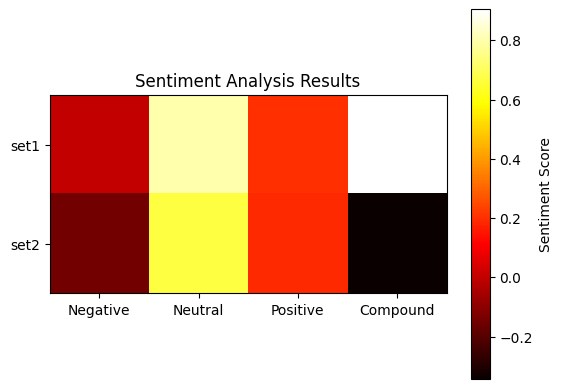

     neg    neu    pos  compound
0  0.000  0.801  0.199    0.9042
1 -0.147  0.666  0.188   -0.3434


In [ ]:
#Create Heatmap for the results
opposite_sentiment_scores = np.array([[0.0 , 0.801 , 0.199 , 0.9042],[-0.147, 0.666, 0.188, -0.3434]])
texts = ['set1', 'set2']
sentiments = ['Negative', 'Neutral', 'Positive', 'Compound']

plt.imshow(opposite_sentiment_scores, cmap='hot', interpolation='nearest')
plt.colorbar(label='Sentiment Score')
plt.xticks(np.arange(len(sentiments)), sentiments)
plt.yticks(np.arange(len(texts)), texts)
plt.title('Sentiment Analysis Results')
plt.show()

import pandas as pd
# Sample sentiment scores
sentiment_scores = [
    [0.0 , 0.801 , 0.199 , 0.9042],
    [-0.147, 0.666, 0.188, -0.3434]
]

# Create a dataframe to store the sentiment analysis data
sentiment_df = pd.DataFrame(sentiment_scores, columns=['neg', 'neu', 'pos', 'compound'])

# Display the dataframe
print(sentiment_df)

#Sort sentences and Inject more Positive Sentences

In [ ]:
# Inject positive sentences and highlight them
positive_sentences = [
    "Independent Contractor Agreements offer flexibility in work schedules and project timelines, allowing contractors to manage their time efficiently",
    "Contractors bring specialized skills and expertise to projects, enhancing the quality of work delivered",
    "Hiring independent contractors can be cost-effective as they are responsible for their own taxes, benefits, and equipment",
    "Businesses can easily scale their workforce up or down based on project requirements by engaging independent contractors",
    "Independent contractors work remotely, reducing the need for office space and equipment, thus lowering overhead costs",
    "Contractors typically require minimal training, as they are hired for their existing skills and experience, saving time and resources for the company"
]

highlighted_text = ""
highlighted_sentences = []

for i, sentence in enumerate(sentences):
    if i < len(positive_sentences):
        # Inject positive sentence
        highlighted_sentence = f"**{positive_sentences[i]}**"
        highlighted_sentences.append(highlighted_sentence)
    highlighted_sentences.append(sentence)

highlighted_sentences.sort()
highlighted_text = ". ".join(highlighted_sentences)

# Display the modified text with highlighted positive sentences
display(Markdown(highlighted_text))



sentiment_scores = analyzer.polarity_scores(positive_sentences)

print("Overall Sentiment Score is Positive:",sentiment_scores)
print('-' * 50)



. 



































. 






Free Independent Contractor Agreement Template - Rocket Lawyer
































































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Business operations






⌃


Sell products or services













MAKE YOUR FREE Independent Contractor Agreement


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Independent Contractor Agreement
            


Make document                    



 


Other Names:
Freelance Contract
Consulting Agreement
Contract Labor Form
1099 Contractor Agreement
Independent Contractor Contract
Freelancer Contractor Agreement
Consulting Contract
Consulting Services Agreement








What weâll cover



About Independent Contractor Agreements


Independent Contractor Agreement FAQs


Independent Contractor Agreement checklist






What is an Independent Contractor Agreement?
An Independent Contractor Agreement is a legal contract that outlines the scope, payment schedule, and deadlines for freelance work. 




Back to top



Back to top












Our quality guarantee
We guarantee our service is safe and secure, and that properly executed Rocket Lawyer legal documents are legally enforceable under applicable US laws.
Need help? No problem!
Ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.



Independent Contractor Agreement checklist
Complete your free Independent Contractor Agreement with our Make it Legal™ checklist







Make this document
Customize your Independent Contractor Agreement by answering simple questions. 




Collapse












Independent Contractor Agreement FAQs








Collapse all

|






Expand all







Why does a business owner need an Independent Contractor Agreement?





A business owner needs an Independent Contractor Agreement for several reasons.
Setting Expectations: An Independent Contractor Agreement explicitly sets out the expectations and parameters of the work to be done, the compensation, and the nature of the relationship itself. 




Collapse





Definitions of Independent Contractor Terms






Term


Definition 




Confidential Information


Private information regarding the business operations of an employer or independent contractor, such as client lists, processes, formulas, or payroll data. 



What are options for signing an Independent Contractor Agreement remotely?





There are various options available for signing an Independent Contractor Agreement remotely, but the most efficient way is to use a third-party application, such as RocketSignÂ®, to sign the document electronically. 



What should be included in an Independent Contractor Agreement?





An Independent Contractor Agreement should contain all of these basic terms:

Description of the services to be provided.
How payment will be handled, whether hourly or on a per-project basis.
Term of the agreement, typically with a definitive end date.
Explanation of what the hiring party will provide or not provide, such as equipment, for the independent contractor to use.
Ownership of work product if that is relevant to the work being performed.
Confidentiality clause.
Applicable governing law of the agreement.

These terms, as well as several others, are included in this free Independent Contractor Agreement.  .    .    .    .    .      .      No other fees and/or expenses will be paid to the Contractor, unless such fees and/or expenses have been approved in advance by the appropriate executive on behalf of the Recipient in writing.    It is contemplated that the relationship between the Contractor and the Recipient shall be a non-exclusive one. "Confidential information" is information that is unique, and for which there would be harm if it was disclosed. **Businesses can easily scale their workforce up or down based on project requirements by engaging independent contractors**. **Contractors bring specialized skills and expertise to projects, enhancing the quality of work delivered**. **Contractors typically require minimal training, as they are hired for their existing skills and experience, saving time and resources for the company**. **Hiring independent contractors can be cost-effective as they are responsible for their own taxes, benefits, and equipment**. **Independent Contractor Agreements offer flexibility in work schedules and project timelines, allowing contractors to manage their time efficiently**. **Independent contractors work remotely, reducing the need for office space and equipment, thus lowering overhead costs**. A severability clause states that the illegal or unenforceable provision can be removed â or severed â and the rest of the contract will remain valid and in force. A single lump sum payment may be made at the completion of service or at some other defined date or event. A typical waiver of breach clause states that, if either party waives their right to enforce the contract or recover damages after a breach by the other party, that will not prevent future actions to enforce the contract or claim damages.



 




Collapse





Tips for Finding and Working With Freelancers


It is easier than ever to find freelance workers for nearly any type of project. APPLICABLE LAW. All terms and conditions contained in any other writings previously executed by the parties regarding the matters contemplated herein shall be deemed to be merged herein and superseded hereby. An "employer-employee" or "principal-agent" relationship is not created merely because (1) the Recipient has or retains the right to supervise or inspect the work as it progresses in order to ensure compliance with the terms of the contract or (2) the Recipient has or retains the right to stop work done improperly. An Independent Contractor Agreement can help you get the details in a written document that is signed by both parties. An advantage to using an online or staffing service is that they often take care of most of the paperwork for you. An indemnification clause in an independent contractor agreement, for example, might state that the independent contractor will be liable for legal claims by third parties arising from their services for the employer, and that the independent contractor will cover the cost of any such claim brought against the employer.




Independent Contractor


An individual or business that has an employment relationship with an employer, but is not an employee. And positive reviews about their project experience with you can help foster beneficial future business relationships.
Working with freelancers can be a great experience if you choose freelancers carefully, be clear about what you need, get the arrangement in writing and signed by both parties, and communicate regularly throughout the project. Any conflict of interest can cause the agent to be legally liable to the principal.




Proprietary Information


Confidential information possessed by an employer, to which an independent contractor or employee may have access in the course of their employment. Beginning on , the Contractor will provide the following services (collectively, the "Services"):         . Compared to employees, they are subject to less control by the employer over how, when, and where they do their work. DESCRIPTION OF SERVICES. ENTIRE AGREEMENT. EXPENSES PAID BY CONTRACTOR. Each party to this relationship has obligations to the other:


The employee must perform their job duties according to their agreement with the employer.


The employer must pay the employee and provide other benefits or perks according to their agreement. Either party may entrust confidential information to the other, although it is more common for employers to entrust such information to independent contractors. Employers usually provide some benefits to employees, such as health insurance and paid time off. Examples may include inventions, designs, formulas, computer code, and other data developed by or for the business. Except in extraordinary circumstances and when necessary, the Contractor shall perform the Services without direct supervision by the Recipient. Except to the extent that the Contractor works in a territory as defined by the Recipient,  services are not integrated into the mainstream of the Recipient's business. For example, "As described in the attached Exhibit."
Payment for Services
This clause describes how payment will be made. For example, independent contractors are responsible for paying all of their own income taxes, while employers are required to deduct part of the employees' taxes from their paychecks. For example: ABC Widget Corporation, Tanya Jones, President.
Contractor
Includes the full name and address of the service provider. 
Description of Services
A description of the services to be provided is an essential part of an Independent Contractor Agreement. Generally, Paying a lump sum fee upon completion of the services is generally recommended to avoid a determination by the IRS that the Contractor is an employee.
Term / Termination
The Independent Contractor Agreement often specifies when the agreement will end. Get started now!





Review your agreement
Look over your customized Independent Contractor Agreement to ensure it matches your intentions. Getting ink signatures on a contract can be a hassle. Having proof of insurance for the activity that the agreement will govern provides additional protection to the Recipient. 
Similarly, a Recipient can also require that the Contractor indemnify the Recipient for any injuries that the Recipient may encounter or cause through the acts of the Contractor. Here are some tips for doing just that.
Evaluating Freelancers
Online freelancer platforms offer a number of ways to evaluate freelancers based on skills and performance. However, if payment (based on the fixed wage) is made weekly or biweekly, the IRS may view such an arrangement as indicating an employer/employee relationship. However, the parties may mutually agree that the Contractor shall perform other services for the Recipient, pursuant to the terms of this Agreement. However, you still need to choose the right freelancer for your needs and maintain a positive relationship. If a court finds that any provision of this Agreement is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited. If any provision of this Agreement shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. If one provision turns out to be unenforceable or unlawful, that could mean that the entire contract is invalid. If that is the case, the parties may choose to have the agreement continue in effect until one of the parties elects to terminate or end it. If the Contractor has assistants, it is the Contractor's responsibility to hire them and to provide materials for them. If the agreement is for services that will be provided on an ongoing basis, fixed wages can be defined to pay for the services at an hourly rate or other period of payment. If the arrangement between the Recipient and the Contractor conforms more closely to the characteristics of an employee/employer relationship, the Employment Agreement may be more appropriate.



Show more





Back to top





Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Independent Contractor Agreement also made:





Non-Disclosure Agreement (NDA)
Ensure that proprietary information stays private







Employment Contract
Make your new hire official







Contract for Services
Set clear terms and conditions for any services







Noncompete Agreement
Protect your company's proprietary information






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Independent Contractor Agreement now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. If the parties know in advance when the services of the Contractor will no longer be needed, that specific date can be entered.  
The parties sometimes want an ongoing relationship. If you are not sure about the employment relationship, you should consult with a Rocket Lawyer network attorney for affordable legal advice.
Here are the main provisions found in an Independent Contractor Agreement, along with descriptions of what the provisions contain and what they mean.
Recipient of Services
Includes the full name of the company, as well as the name and title of the representative who will sign the agreement on the company's behalf. Independent Contractor section below. Independent contractors often have their own established business or trade that exists separate from the employer. It is a clear-cut explanation of the expected workflow, how communication will be handled, and how the relationship will work.
Work Product Ownership: An Independent Contractor Agreement protects your business interests by:


Establishing ownership of any work product generated as a result of the arrangement.


Requiring contractors to actively protect trade secrets.


Providing for confidentiality and non-disclosure of key business information.


Affirming the Independent Contractor-Client Relationship: Employers are required to do certain things for employees that they are not required to do for independent contractors, so it's important to affirm the relationship in writing. It is also helpful to network with good freelancers since they may have connections to other talent you may need to help you with future projects. It is designed to clearly establish the Contractor as an independent contractor and not as the Recipientâs employee. It is recommended that you read about the IRS guidelines in the Employee vs. It is understood by the parties that the Contractor is an independent contractor with respect to the Recipient, and not an employee of the Recipient. Look for the following information: 

Client reviews
Project completions (the number of projects the freelancer has completed)
Portfolios or examples of work
Response time
Recent employment
Education or certifications
Skills test scores

If you need someone to create assets for you, such as illustrations, infographics, photos, design templates, a website, articles, blog posts, social media posts, videos, etc., be sure to ask for examples of their work before hiring them. Most freelance creatives will have a portfolio to show prospective clients. 
Also consider scheduling an in-person, phone, or video interview in addition to checking available information about the freelancer. Multiple installment payments may be made on specific dates or after specific events have occurred, such as completion of various stages of a project. NO LOCATION ON PREMISES. NO RIGHT TO ACT AS AGENT. NO SET WORK HOURS. No modification of this Agreement shall be deemed effective unless in writing and signed by the parties hereto. Of course, if an employment relationship is desired by both parties, then an Employment Contract might be used. PAYMENT FOR SERVICES. PERSONAL SERVICES NOT REQUIRED. PROFESSIONAL CAPACITY. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. Plus, you can always save and continue later once youâve started your document creation process. Proprietary information that has value to the employer by virtue of not being widely known to the general public is known as âtrade secrets.â Independent contractors may be expected to safeguard the secrecy of proprietary information under a non-disclosure agreement (NDA). RECIPIENT'S CONTROL. RELATIONSHIP OF PARTIES. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. RocketSign eliminates the back-and-forth by providing an end-to-end solution for your document signing needs.
Having an Independent Contractor Agreement with each of your freelancers will help establish the work to be done, protect your interests in the assets that are created by the independent contractor for your business, and add clarity to the independent contractor-client relationship that is the intent of both you and your new freelancer. SEVERABILITY. SIGNATORIES. Signed by both the contractor and the client, this agreement can help to set expectations and reduce the risk of conflicts.
When can you use an Independent Contractor Agreement?

You will be completing services for a person or company on a project-to-project basis (i.e. Signing documents electronically has become a necessity due to the business challenges that have arisen as a result of the COVID-19 pandemic. TERM/TERMINATION. The Contractor also performs services for other organizations and/or individuals. The Contractor has no desk or other equipment either located at or furnished by the Recipient. The Contractor has no right to act as an agent for the Recipient and has an obligation to notify any involved parties that it is not an agent of the Recipient. The Contractor has no set hours of work. The Contractor has not and will not receive training from the Recipient regarding how to perform the Services. The Contractor is a professional who uses  own professional and business methods to perform services. The Contractor is not required to render the Services personally and may employ others to perform the Services on behalf of the Recipient without the Recipient's knowledge or consent. The Contractor shall be solely responsible for any and all taxes, Social Security contributions or payments, disability insurance, unemployment taxes, and other payroll type taxes applicable to such compensation. The Contractor's business and travel expenses are to be paid by the Contractor and not by the Recipient. The Recipient has no right or power to control or otherwise interfere with the Contractor's mode of effecting performance under this Agreement. The Recipient has no right to assign services to the Contractor other than as specifically contemplated by this Agreement. The Recipient has no right to further inquire into the Contractor's other activities. The Recipient may wish to require that the Contractor obtain insurance to cover all of its employees as to this particular agreement. The Recipient will not provide fringe benefits, including health insurance benefits, paid vacation, or any other employee benefit, for the benefit of the Contractor. The Recipient will pay compensation to the Contractor for the Services upon completion of the Services. The Recipient's only concern is the result of the Contractor's work, and not the means of accomplishing it. The activities that are the responsibility of the Contractor versus the Recipient helps to establish that the Contractor is not the Recipientâs employee. 
Recipientâs Control
This clause establishes that the Recipient is not in control of how the Contractor does their work.
Professional Capacity
This clause establishes that the Contractor is a professional and does not require training from the Recipient in order to do their work.
Personal Services Not Required
This provision states clearly that the Contractor is not required to perform services personally, but may, instead, hire others to perform the services required under the contract.
No Location on Premises
This provision states that the Contractor does not have equipment or a desk located at or furnished by the Recipient.
No Set Work Hours
This clause confirms that the Contractor has no set hours and is not required to work a set number of hours.
Expenses Paid by Contractor
This clause establishes that business and travel expenses will be paid by the Contractor, not the Recipient.
Ownership of Social Media Contacts
If the Independent Contractor will create, operate, or maintain social media accounts for the Recipient, this clause can spell out who will own the contacts associated with the accounts.
Independent Contractor Confidentiality
The Independent Contractor Agreement sometimes includes a clause that obligates the Contractor to protect and not disclose the Recipient's proprietary or confidential information. The agentâs authority may be subject to change or revocation by the principal.
When acting on behalf of the principal, the agent has a fiduciary duty to put the principalâs interests first. The contract between the parties might include a non-disclosure agreement (NDA) or confidentiality clause that prevents either party from revealing the otherâs confidential information.




Employer-Employee Relationship


A relationship by which an employee performs work for the employer, and the employer provides, at a minimum, financial compensation. The parties may then modify or rewrite the invalid provision.




Waiver of Breach


A clause commonly included in independent contractor agreements that addresses the enforceability of the contract. The principal can grant broad authority to the agent, or it can limit the agentâs authority to certain acts, issues, or matters. The waiver by the Recipient of a breach of any provision of this Agreement by Contractor shall not operate or be construed as a waiver of any subsequent breach by Contractor. There are numerous online resources for finding contract workers for technical gigs such as app building, website creation, and content writing. There is no requirement that the Contractor work full time or otherwise account for work hours. These are common payment options, but custom payment terms can be written into the contract.    
It is not unusual for a Contractor to provide services based on an hourly rate or other fixed wage. These benefits are not offered to independent contractors.
Having a contract alone may not necessarily protect you from a contractor later claiming they were an employee, but it may be a good thing to do nonetheless because it indicates the intention to have an independent contractor-client arrangement at the outset of the relationship. They are also not covered by employment statutes that address matters like workplace discrimination, minimum wage, or overtime pay.




Principal-Agent Relationship


An arrangement between two parties in which one party (the principal) grants legal authority to the other party (the agent) to act on its behalf. They may face legal liability, either under law or contract, for misusing or appropriating such information.




Severability


A clause often included in contracts stating that each provision of the contract is independent of the others. They must also abide by all applicable local, state, and federal employment laws.






Indemnification


A form of risk allocation between the parties to a contract, in which one party agrees to cover losses suffered by the other party, or to defend them against legal claims brought in connection with the contract. This Agreement constitutes the entire contract between the parties. This Agreement is effective as of the date first above written. This Agreement shall be governed by the laws of the . This Agreement shall be signed by , and by , . This agreement can also include a confidentiality clause that requires the freelancer to keep any sensitive business information confidential, protecting you and your businessâ trade secrets.
Leveraging the Freelance Network
If you end up having a positive experience and a good relationship with the freelancer youâve hired, you may decide to provide a favorable review or refer them to your colleagues if they need similar work done. This contract defines not only the services to be provided and the compensation to be given, but also defines the relationship between the parties. This essentially means that the Contractor is responsible if something or someone is harmed because of the activities of the Contractor. This gives the parties the flexibility to agree to a long term commitment while retaining some freedom to end the contract when necessary.  
Finally, if the services will be needed for only one job or project of unknown length, it may be best to state that the contractor agreement will terminate upon the completion of the particular project for which the Contractor is being retained. 
Relationship of Parties
Defining the relationship of the parties is an important part of an Independent Contractor Agreement. This provision sometimes also includes a sentence that requires the Contractor to return the Recipient's records.
Liability Insurance and Indemnity
The Recipient may wish to include several provisions that extend protections to the Recipient for the actions of the Contractor. Upon termination of this Agreement, the Contractor will return to the Recipient all Confidential Information, whether physical or electronic, and other items that were used, created, or controlled by the Contractor during the term of this Agreement. WAIVER OF BREACH. Weâll help you along the way and build a document that fits your needs. Whether youâre looking for a remote freelancer or someone to do an in-person job, such as a gardener, pet sitter, or maintenance worker, an in-person interview or, at the very least, a video call, often helps to finalize the decision and is worth the extra time and effort. 
Working with Freelancers
Once you have engaged a freelancer, make sure you are all on the same page regarding what you expect to be done or delivered, any milestones and deadlines, and how and when to communicate should anything about the project change. You can also find online connections to people who do onsite jobs such as lawn care, home repair, or dog walking. You can share your document from your account.




Important Details
The Independent Contractor Agreement should only be used for a party who is an "independent contractor" with respect to the Recipient. You may also want to  review the agreement with any other parties to avoid delays at signing.

Re member that if you have any questions you can easily ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.





Sign this document
This document needs to be signed by:
 

All Providers (or Representatives of the Providing Company).
All Recipients (or Representatives of the Receiving Company).


The Agreement can be signed online.

It becomes effective as of the date specified in the Agreement.

Securely sign online and invite others to sign with RocketSignÂ®





Everyone gets a copy
Anyone named in the document should receive a copy of the signed document.

If you sign this agreement online a copy will be securely stored in your account. You may list services on a separate attachment to the agreement if the list is long, and then refer to the attachment in the agreement. You might seek further protection by having an attorney review your Independent Contractor Agreement or seeking answers to questions you might have. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top




Legal sources

Find the sources and laws relevant to your Independent Contractor Agreement below:


26 CFR Â§ 31.3121(d)-1
 
Back to top
















































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. as an independent contractor or freelancer).
You will be receiving services from an independent contractor.
Note: If you are hiring an employee (not an independent contractor) use an employment agreement instead.






Sample Independent Contractor Agreement
The terms in your document will update based on the information you provide





This document has been customized over 161.5K times



Legally binding and enforceable



Complies with relevant laws



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


       This  (this "Agreement") is made effective as of , by and between  (the "Recipient"), of and  (the "Contractor"), of In this Agreement, the party who is contracting to receive the services shall be referred to as "Recipient", and the party who will be providing the services shall be referred to as "Contractor."     . no later than . shall terminate automatically on .may be terminated by either party upon  days' written notice to the other party. the Contractor.   .   .   .   .   .   .     .     .         RECIPIENT:               By:   Date:             CONTRACTOR:               By:   Date:             




 







About Independent Contractor Agreements
Learn how to hire or be hired with confidence







Collapse all

|






Expand all








How To Write an Independent Contractor Agreement


The Independent Contractor Agreement (also known as a Contractor Agreement or Contractor Contract) is a contract between a provider of services (the Contractor) and the recipient of services (the Recipient).   A regular, ongoing relationship of indefinite term is not contemplated.   the Recipient

Overall Sentiment Score is Positive: {'neg': 0.018, 'neu': 0.85, 'pos': 0.131, 'compound': 0.8807}
--------------------------------------------------


#Sort sentences and Inject more Negative sentences

In [ ]:
negative_sentences = [
    "Independent Contractor Agreements can lack job security for contractors",
    "These agreements may not include benefits such as health insurance or paid time off",
    "Contractors might face payment delays or disputes due to unclear terms in the agreement",
    "Independent Contractor Agreements often limit the contractor's ability to work for other clients simultaneously",
    "Disputes over intellectual property rights can arise from vague clauses in these agreements",
    "Contractors may bear the burden of liability for accidents or damages without proper insurance coverage under the agreement"
]

highlighted_text_negative = ""
for i, sentence in enumerate(sentences):
    if i < len(negative_sentences):
        # Inject negative sentence
        highlighted_sentence_negative = f"**{negative_sentences[i]}**"
        highlighted_text_negative += highlighted_sentence_negative + ". "
    highlighted_text_negative += sentence + ". "

highlighted_text_negative = highlighted_text_negative.split('. ')
highlighted_text_negative.sort()
highlighted_text_negative = '. '.join(highlighted_text_negative)
# Display the modified text with highlighted negative sentences
display(Markdown(highlighted_text_negative))

negative_sentiment_scores = analyzer.polarity_scores(negative_sentences)
negative_sentiment_scores['neg'] *= -1
negative_sentiment_scores['compound'] *= 1

# Determine if overall sentiment is negative
overall_sentiment_scores = analyzer.polarity_scores(text)
if overall_sentiment_scores['neg'] < overall_sentiment_scores['pos']:
    print("Overall Sentiment Score is Negative:", negative_sentiment_scores)
print('-' * 50)


. . 



































. 






Free Independent Contractor Agreement Template - Rocket Lawyer
































































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Business operations






⌃


Sell products or services













MAKE YOUR FREE Independent Contractor Agreement


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Independent Contractor Agreement
            


Make document                    



 


Other Names:
Freelance Contract
Consulting Agreement
Contract Labor Form
1099 Contractor Agreement
Independent Contractor Contract
Freelancer Contractor Agreement
Consulting Contract
Consulting Services Agreement








What weâll cover



About Independent Contractor Agreements


Independent Contractor Agreement FAQs


Independent Contractor Agreement checklist






What is an Independent Contractor Agreement?
An Independent Contractor Agreement is a legal contract that outlines the scope, payment schedule, and deadlines for freelance work. 




Back to top



Back to top












Our quality guarantee
We guarantee our service is safe and secure, and that properly executed Rocket Lawyer legal documents are legally enforceable under applicable US laws.
Need help? No problem!
Ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.



Independent Contractor Agreement checklist
Complete your free Independent Contractor Agreement with our Make it Legal™ checklist







Make this document
Customize your Independent Contractor Agreement by answering simple questions. 




Collapse












Independent Contractor Agreement FAQs








Collapse all

|






Expand all







Why does a business owner need an Independent Contractor Agreement?





A business owner needs an Independent Contractor Agreement for several reasons.
Setting Expectations: An Independent Contractor Agreement explicitly sets out the expectations and parameters of the work to be done, the compensation, and the nature of the relationship itself. 




Collapse





Definitions of Independent Contractor Terms






Term


Definition 




Confidential Information


Private information regarding the business operations of an employer or independent contractor, such as client lists, processes, formulas, or payroll data. 



What are options for signing an Independent Contractor Agreement remotely?





There are various options available for signing an Independent Contractor Agreement remotely, but the most efficient way is to use a third-party application, such as RocketSignÂ®, to sign the document electronically. 



What should be included in an Independent Contractor Agreement?





An Independent Contractor Agreement should contain all of these basic terms:

Description of the services to be provided.
How payment will be handled, whether hourly or on a per-project basis.
Term of the agreement, typically with a definitive end date.
Explanation of what the hiring party will provide or not provide, such as equipment, for the independent contractor to use.
Ownership of work product if that is relevant to the work being performed.
Confidentiality clause.
Applicable governing law of the agreement.

These terms, as well as several others, are included in this free Independent Contractor Agreement.  .    .    .    .    .      .      No other fees and/or expenses will be paid to the Contractor, unless such fees and/or expenses have been approved in advance by the appropriate executive on behalf of the Recipient in writing.    It is contemplated that the relationship between the Contractor and the Recipient shall be a non-exclusive one. "Confidential information" is information that is unique, and for which there would be harm if it was disclosed. **Contractors may bear the burden of liability for accidents or damages without proper insurance coverage under the agreement**. **Contractors might face payment delays or disputes due to unclear terms in the agreement**. **Disputes over intellectual property rights can arise from vague clauses in these agreements**. **Independent Contractor Agreements can lack job security for contractors**. **Independent Contractor Agreements often limit the contractor's ability to work for other clients simultaneously**. **These agreements may not include benefits such as health insurance or paid time off**. A severability clause states that the illegal or unenforceable provision can be removed â or severed â and the rest of the contract will remain valid and in force. A single lump sum payment may be made at the completion of service or at some other defined date or event. A typical waiver of breach clause states that, if either party waives their right to enforce the contract or recover damages after a breach by the other party, that will not prevent future actions to enforce the contract or claim damages.



 




Collapse





Tips for Finding and Working With Freelancers


It is easier than ever to find freelance workers for nearly any type of project. APPLICABLE LAW. All terms and conditions contained in any other writings previously executed by the parties regarding the matters contemplated herein shall be deemed to be merged herein and superseded hereby. An "employer-employee" or "principal-agent" relationship is not created merely because (1) the Recipient has or retains the right to supervise or inspect the work as it progresses in order to ensure compliance with the terms of the contract or (2) the Recipient has or retains the right to stop work done improperly. An Independent Contractor Agreement can help you get the details in a written document that is signed by both parties. An advantage to using an online or staffing service is that they often take care of most of the paperwork for you. An indemnification clause in an independent contractor agreement, for example, might state that the independent contractor will be liable for legal claims by third parties arising from their services for the employer, and that the independent contractor will cover the cost of any such claim brought against the employer.




Independent Contractor


An individual or business that has an employment relationship with an employer, but is not an employee. And positive reviews about their project experience with you can help foster beneficial future business relationships.
Working with freelancers can be a great experience if you choose freelancers carefully, be clear about what you need, get the arrangement in writing and signed by both parties, and communicate regularly throughout the project. Any conflict of interest can cause the agent to be legally liable to the principal.




Proprietary Information


Confidential information possessed by an employer, to which an independent contractor or employee may have access in the course of their employment. Beginning on , the Contractor will provide the following services (collectively, the "Services"):         . Compared to employees, they are subject to less control by the employer over how, when, and where they do their work. DESCRIPTION OF SERVICES. ENTIRE AGREEMENT. EXPENSES PAID BY CONTRACTOR. Each party to this relationship has obligations to the other:


The employee must perform their job duties according to their agreement with the employer.


The employer must pay the employee and provide other benefits or perks according to their agreement. Either party may entrust confidential information to the other, although it is more common for employers to entrust such information to independent contractors. Employers usually provide some benefits to employees, such as health insurance and paid time off. Examples may include inventions, designs, formulas, computer code, and other data developed by or for the business. Except in extraordinary circumstances and when necessary, the Contractor shall perform the Services without direct supervision by the Recipient. Except to the extent that the Contractor works in a territory as defined by the Recipient,  services are not integrated into the mainstream of the Recipient's business. For example, "As described in the attached Exhibit."
Payment for Services
This clause describes how payment will be made. For example, independent contractors are responsible for paying all of their own income taxes, while employers are required to deduct part of the employees' taxes from their paychecks. For example: ABC Widget Corporation, Tanya Jones, President.
Contractor
Includes the full name and address of the service provider. 
Description of Services
A description of the services to be provided is an essential part of an Independent Contractor Agreement. Generally, Paying a lump sum fee upon completion of the services is generally recommended to avoid a determination by the IRS that the Contractor is an employee.
Term / Termination
The Independent Contractor Agreement often specifies when the agreement will end. Get started now!





Review your agreement
Look over your customized Independent Contractor Agreement to ensure it matches your intentions. Getting ink signatures on a contract can be a hassle. Having proof of insurance for the activity that the agreement will govern provides additional protection to the Recipient. 
Similarly, a Recipient can also require that the Contractor indemnify the Recipient for any injuries that the Recipient may encounter or cause through the acts of the Contractor. Here are some tips for doing just that.
Evaluating Freelancers
Online freelancer platforms offer a number of ways to evaluate freelancers based on skills and performance. However, if payment (based on the fixed wage) is made weekly or biweekly, the IRS may view such an arrangement as indicating an employer/employee relationship. However, the parties may mutually agree that the Contractor shall perform other services for the Recipient, pursuant to the terms of this Agreement. However, you still need to choose the right freelancer for your needs and maintain a positive relationship. If a court finds that any provision of this Agreement is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision shall be deemed to be written, construed, and enforced as so limited. If any provision of this Agreement shall be held to be invalid or unenforceable for any reason, the remaining provisions shall continue to be valid and enforceable. If one provision turns out to be unenforceable or unlawful, that could mean that the entire contract is invalid. If that is the case, the parties may choose to have the agreement continue in effect until one of the parties elects to terminate or end it. If the Contractor has assistants, it is the Contractor's responsibility to hire them and to provide materials for them. If the agreement is for services that will be provided on an ongoing basis, fixed wages can be defined to pay for the services at an hourly rate or other period of payment. If the arrangement between the Recipient and the Contractor conforms more closely to the characteristics of an employee/employer relationship, the Employment Agreement may be more appropriate.



Show more





Back to top





Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Independent Contractor Agreement also made:





Non-Disclosure Agreement (NDA)
Ensure that proprietary information stays private







Employment Contract
Make your new hire official







Contract for Services
Set clear terms and conditions for any services







Noncompete Agreement
Protect your company's proprietary information






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Independent Contractor Agreement now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. If the parties know in advance when the services of the Contractor will no longer be needed, that specific date can be entered.  
The parties sometimes want an ongoing relationship. If you are not sure about the employment relationship, you should consult with a Rocket Lawyer network attorney for affordable legal advice.
Here are the main provisions found in an Independent Contractor Agreement, along with descriptions of what the provisions contain and what they mean.
Recipient of Services
Includes the full name of the company, as well as the name and title of the representative who will sign the agreement on the company's behalf. Independent Contractor section below. Independent contractors often have their own established business or trade that exists separate from the employer. It is a clear-cut explanation of the expected workflow, how communication will be handled, and how the relationship will work.
Work Product Ownership: An Independent Contractor Agreement protects your business interests by:


Establishing ownership of any work product generated as a result of the arrangement.


Requiring contractors to actively protect trade secrets.


Providing for confidentiality and non-disclosure of key business information.


Affirming the Independent Contractor-Client Relationship: Employers are required to do certain things for employees that they are not required to do for independent contractors, so it's important to affirm the relationship in writing. It is also helpful to network with good freelancers since they may have connections to other talent you may need to help you with future projects. It is designed to clearly establish the Contractor as an independent contractor and not as the Recipientâs employee. It is recommended that you read about the IRS guidelines in the Employee vs. It is understood by the parties that the Contractor is an independent contractor with respect to the Recipient, and not an employee of the Recipient. Look for the following information: 

Client reviews
Project completions (the number of projects the freelancer has completed)
Portfolios or examples of work
Response time
Recent employment
Education or certifications
Skills test scores

If you need someone to create assets for you, such as illustrations, infographics, photos, design templates, a website, articles, blog posts, social media posts, videos, etc., be sure to ask for examples of their work before hiring them. Most freelance creatives will have a portfolio to show prospective clients. 
Also consider scheduling an in-person, phone, or video interview in addition to checking available information about the freelancer. Multiple installment payments may be made on specific dates or after specific events have occurred, such as completion of various stages of a project. NO LOCATION ON PREMISES. NO RIGHT TO ACT AS AGENT. NO SET WORK HOURS. No modification of this Agreement shall be deemed effective unless in writing and signed by the parties hereto. Of course, if an employment relationship is desired by both parties, then an Employment Contract might be used. PAYMENT FOR SERVICES. PERSONAL SERVICES NOT REQUIRED. PROFESSIONAL CAPACITY. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. Plus, you can always save and continue later once youâve started your document creation process. Proprietary information that has value to the employer by virtue of not being widely known to the general public is known as âtrade secrets.â Independent contractors may be expected to safeguard the secrecy of proprietary information under a non-disclosure agreement (NDA). RECIPIENT'S CONTROL. RELATIONSHIP OF PARTIES. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. RocketSign eliminates the back-and-forth by providing an end-to-end solution for your document signing needs.
Having an Independent Contractor Agreement with each of your freelancers will help establish the work to be done, protect your interests in the assets that are created by the independent contractor for your business, and add clarity to the independent contractor-client relationship that is the intent of both you and your new freelancer. SEVERABILITY. SIGNATORIES. Signed by both the contractor and the client, this agreement can help to set expectations and reduce the risk of conflicts.
When can you use an Independent Contractor Agreement?

You will be completing services for a person or company on a project-to-project basis (i.e. Signing documents electronically has become a necessity due to the business challenges that have arisen as a result of the COVID-19 pandemic. TERM/TERMINATION. The Contractor also performs services for other organizations and/or individuals. The Contractor has no desk or other equipment either located at or furnished by the Recipient. The Contractor has no right to act as an agent for the Recipient and has an obligation to notify any involved parties that it is not an agent of the Recipient. The Contractor has no set hours of work. The Contractor has not and will not receive training from the Recipient regarding how to perform the Services. The Contractor is a professional who uses  own professional and business methods to perform services. The Contractor is not required to render the Services personally and may employ others to perform the Services on behalf of the Recipient without the Recipient's knowledge or consent. The Contractor shall be solely responsible for any and all taxes, Social Security contributions or payments, disability insurance, unemployment taxes, and other payroll type taxes applicable to such compensation. The Contractor's business and travel expenses are to be paid by the Contractor and not by the Recipient. The Recipient has no right or power to control or otherwise interfere with the Contractor's mode of effecting performance under this Agreement. The Recipient has no right to assign services to the Contractor other than as specifically contemplated by this Agreement. The Recipient has no right to further inquire into the Contractor's other activities. The Recipient may wish to require that the Contractor obtain insurance to cover all of its employees as to this particular agreement. The Recipient will not provide fringe benefits, including health insurance benefits, paid vacation, or any other employee benefit, for the benefit of the Contractor. The Recipient will pay compensation to the Contractor for the Services upon completion of the Services. The Recipient's only concern is the result of the Contractor's work, and not the means of accomplishing it. The activities that are the responsibility of the Contractor versus the Recipient helps to establish that the Contractor is not the Recipientâs employee. 
Recipientâs Control
This clause establishes that the Recipient is not in control of how the Contractor does their work.
Professional Capacity
This clause establishes that the Contractor is a professional and does not require training from the Recipient in order to do their work.
Personal Services Not Required
This provision states clearly that the Contractor is not required to perform services personally, but may, instead, hire others to perform the services required under the contract.
No Location on Premises
This provision states that the Contractor does not have equipment or a desk located at or furnished by the Recipient.
No Set Work Hours
This clause confirms that the Contractor has no set hours and is not required to work a set number of hours.
Expenses Paid by Contractor
This clause establishes that business and travel expenses will be paid by the Contractor, not the Recipient.
Ownership of Social Media Contacts
If the Independent Contractor will create, operate, or maintain social media accounts for the Recipient, this clause can spell out who will own the contacts associated with the accounts.
Independent Contractor Confidentiality
The Independent Contractor Agreement sometimes includes a clause that obligates the Contractor to protect and not disclose the Recipient's proprietary or confidential information. The agentâs authority may be subject to change or revocation by the principal.
When acting on behalf of the principal, the agent has a fiduciary duty to put the principalâs interests first. The contract between the parties might include a non-disclosure agreement (NDA) or confidentiality clause that prevents either party from revealing the otherâs confidential information.




Employer-Employee Relationship


A relationship by which an employee performs work for the employer, and the employer provides, at a minimum, financial compensation. The parties may then modify or rewrite the invalid provision.




Waiver of Breach


A clause commonly included in independent contractor agreements that addresses the enforceability of the contract. The principal can grant broad authority to the agent, or it can limit the agentâs authority to certain acts, issues, or matters. The waiver by the Recipient of a breach of any provision of this Agreement by Contractor shall not operate or be construed as a waiver of any subsequent breach by Contractor. There are numerous online resources for finding contract workers for technical gigs such as app building, website creation, and content writing. There is no requirement that the Contractor work full time or otherwise account for work hours. These are common payment options, but custom payment terms can be written into the contract.    
It is not unusual for a Contractor to provide services based on an hourly rate or other fixed wage. These benefits are not offered to independent contractors.
Having a contract alone may not necessarily protect you from a contractor later claiming they were an employee, but it may be a good thing to do nonetheless because it indicates the intention to have an independent contractor-client arrangement at the outset of the relationship. They are also not covered by employment statutes that address matters like workplace discrimination, minimum wage, or overtime pay.




Principal-Agent Relationship


An arrangement between two parties in which one party (the principal) grants legal authority to the other party (the agent) to act on its behalf. They may face legal liability, either under law or contract, for misusing or appropriating such information.




Severability


A clause often included in contracts stating that each provision of the contract is independent of the others. They must also abide by all applicable local, state, and federal employment laws.






Indemnification


A form of risk allocation between the parties to a contract, in which one party agrees to cover losses suffered by the other party, or to defend them against legal claims brought in connection with the contract. This Agreement constitutes the entire contract between the parties. This Agreement is effective as of the date first above written. This Agreement shall be governed by the laws of the . This Agreement shall be signed by , and by , . This agreement can also include a confidentiality clause that requires the freelancer to keep any sensitive business information confidential, protecting you and your businessâ trade secrets.
Leveraging the Freelance Network
If you end up having a positive experience and a good relationship with the freelancer youâve hired, you may decide to provide a favorable review or refer them to your colleagues if they need similar work done. This contract defines not only the services to be provided and the compensation to be given, but also defines the relationship between the parties. This essentially means that the Contractor is responsible if something or someone is harmed because of the activities of the Contractor. This gives the parties the flexibility to agree to a long term commitment while retaining some freedom to end the contract when necessary.  
Finally, if the services will be needed for only one job or project of unknown length, it may be best to state that the contractor agreement will terminate upon the completion of the particular project for which the Contractor is being retained. 
Relationship of Parties
Defining the relationship of the parties is an important part of an Independent Contractor Agreement. This provision sometimes also includes a sentence that requires the Contractor to return the Recipient's records.
Liability Insurance and Indemnity
The Recipient may wish to include several provisions that extend protections to the Recipient for the actions of the Contractor. Upon termination of this Agreement, the Contractor will return to the Recipient all Confidential Information, whether physical or electronic, and other items that were used, created, or controlled by the Contractor during the term of this Agreement. WAIVER OF BREACH. Weâll help you along the way and build a document that fits your needs. Whether youâre looking for a remote freelancer or someone to do an in-person job, such as a gardener, pet sitter, or maintenance worker, an in-person interview or, at the very least, a video call, often helps to finalize the decision and is worth the extra time and effort. 
Working with Freelancers
Once you have engaged a freelancer, make sure you are all on the same page regarding what you expect to be done or delivered, any milestones and deadlines, and how and when to communicate should anything about the project change. You can also find online connections to people who do onsite jobs such as lawn care, home repair, or dog walking. You can share your document from your account.




Important Details
The Independent Contractor Agreement should only be used for a party who is an "independent contractor" with respect to the Recipient. You may also want to  review the agreement with any other parties to avoid delays at signing.

Re member that if you have any questions you can easily ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.





Sign this document
This document needs to be signed by:
 

All Providers (or Representatives of the Providing Company).
All Recipients (or Representatives of the Receiving Company).


The Agreement can be signed online.

It becomes effective as of the date specified in the Agreement.

Securely sign online and invite others to sign with RocketSignÂ®





Everyone gets a copy
Anyone named in the document should receive a copy of the signed document.

If you sign this agreement online a copy will be securely stored in your account. You may list services on a separate attachment to the agreement if the list is long, and then refer to the attachment in the agreement. You might seek further protection by having an attorney review your Independent Contractor Agreement or seeking answers to questions you might have. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top




Legal sources

Find the sources and laws relevant to your Independent Contractor Agreement below:


26 CFR Â§ 31.3121(d)-1
 
Back to top
















































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. as an independent contractor or freelancer).
You will be receiving services from an independent contractor.
Note: If you are hiring an employee (not an independent contractor) use an employment agreement instead.






Sample Independent Contractor Agreement
The terms in your document will update based on the information you provide





This document has been customized over 161.5K times



Legally binding and enforceable



Complies with relevant laws



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


       This  (this "Agreement") is made effective as of , by and between  (the "Recipient"), of and  (the "Contractor"), of In this Agreement, the party who is contracting to receive the services shall be referred to as "Recipient", and the party who will be providing the services shall be referred to as "Contractor."     . no later than . shall terminate automatically on .may be terminated by either party upon  days' written notice to the other party. the Contractor.   .   .   .   .   .   .     .     .         RECIPIENT:               By:   Date:             CONTRACTOR:               By:   Date:             




 







About Independent Contractor Agreements
Learn how to hire or be hired with confidence







Collapse all

|






Expand all








How To Write an Independent Contractor Agreement


The Independent Contractor Agreement (also known as a Contractor Agreement or Contractor Contract) is a contract between a provider of services (the Contractor) and the recipient of services (the Recipient).   A regular, ongoing relationship of indefinite term is not contemplated.   the Recipient

Overall Sentiment Score is Negative: {'neg': -0.202, 'neu': 0.62, 'pos': 0.178, 'compound': -0.0987}
--------------------------------------------------


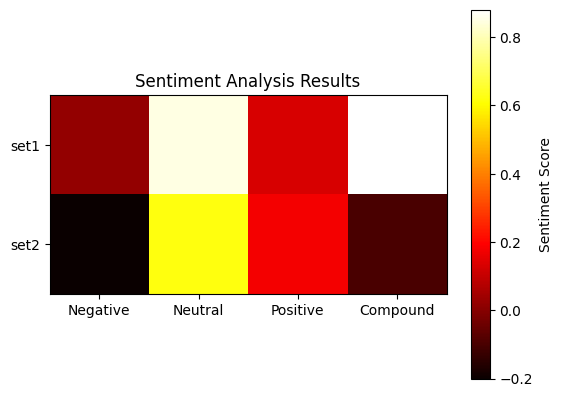

In [ ]:
#Create Heatmap for the results
sentiment_heatmap = np.array([[0.018, 0.85 , 0.131 , 0.8807],[-0.202 , 0.62, 0.178 , -0.0987]])
texts = ['set1', 'set2']
sentiments = ['Negative', 'Neutral', 'Positive', 'Compound']

plt.imshow(sentiment_heatmap, cmap='hot', interpolation='nearest')
plt.colorbar(label='Sentiment Score')
plt.xticks(np.arange(len(sentiments)), sentiments)
plt.yticks(np.arange(len(texts)), texts)
plt.title('Sentiment Analysis Results')
plt.show()